In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.datasets import make_regression

In [2]:
train_data = pd.read_csv("export-fingers-data-train.csv")
test_data = pd.read_csv("export-fingers-data-test.csv")

In [3]:
train_data.head()

,path,rightHand,fingersCount,density,angle_x,angle_y,meanX,meanY,mean_middle_point
0,../../train/00048bba-979b-4f84-b833-5bbbb082b5...,L,0,0.695632,0.152649,1.478467,0.481579,0.522134,0.252343
1,../../train/000547a2-d456-4b16-b351-12ca9b40e3...,L,0,0.700680,0.218669,1.448954,0.492044,0.465029,0.406306
2,../../train/000cac8e-fcf0-4f8c-bd16-c257d1e6d7...,L,2,0.603233,0.993863,1.605666,0.560173,0.555149,0.197985
3,../../train/000d9961-8136-4dee-9820-86e1787779...,L,0,0.644762,0.118490,1.451367,0.480569,0.502836,0.151306
4,../../train/0010095b-2e3d-4517-a511-1f688c378f...,L,5,0.365964,-0.223477,1.642960,0.535456,0.570493,0.077017


In [4]:
def generate_response( hand, finger_count ):
    return f"{finger_count}{hand}"


In [5]:
HAND_MAP = ['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']

In [6]:
# Aplicar a função às colunas 'RightHand' e 'FingersCount' e armazenar o resultado em uma nova coluna 'response'
y_train = train_data.apply(lambda row: generate_response(row['rightHand'], row['fingersCount']), axis=1)
y_test = test_data.apply(lambda row: generate_response(row['rightHand'], row['fingersCount']), axis=1)

# Remover as primeiras 3 colunas ('path', 'RightHand', 'FingersCount')
x_train = train_data.drop(['path', 'rightHand', 'fingersCount'], axis=1)
x_test = test_data.drop(['path', 'rightHand', 'fingersCount'], axis=1)

## Treinando modelo 

In [7]:
model = RandomForestClassifier()

In [8]:
start_time = time.time() 

In [9]:
# help( model.fit )
fit = model.fit( x_train, y_train )

In [10]:
end_time = time.time()
print("Tempo de processamento (em segundos) : ", (end_time - start_time))

Tempo de processamento (em segundos) :  3.3949310779571533


In [11]:
print(fit)

RandomForestClassifier()


In [12]:
y_pred = model.predict(x_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9822222222222222


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
conf_matrix = confusion_matrix(y_pred, y_test)

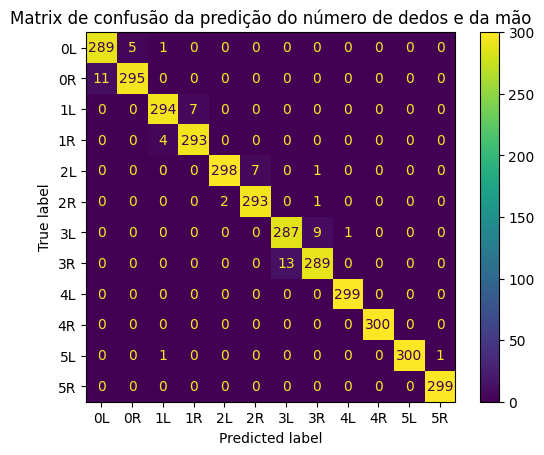

In [16]:
labels = HAND_MAP

disp = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix, 
    display_labels = labels)
disp.plot()
plt.title("Matrix de confusão da predição do número de dedos e da mão")
plt.show()

In [21]:
#input = [0.4409681227863046,-0.15037142800713454,1.6871514920017714,0.5405392614227955,0.553504059528156,24.731013035526484]
input = [0.3900642368384304, 0.0964737751825869, 1.3258176636680326, 0.49802775228195956, 0.5780498826891358, 49.745486907031996]
resp = model.predict([input])

print(resp[0])

3L


C:\Users\mauro\Desktop\Cursos\Atlantico Bootcamp - Machine Learning\avanti-ml-equipe-6\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Salvando modelo

In [22]:
import pickle

In [23]:
with open('../../Entrega 3/model_randomForest.pkl','wb') as f:
    pickle.dump(model,f)